In [1]:
using PyPlot
using Images
using LinearAlgebra

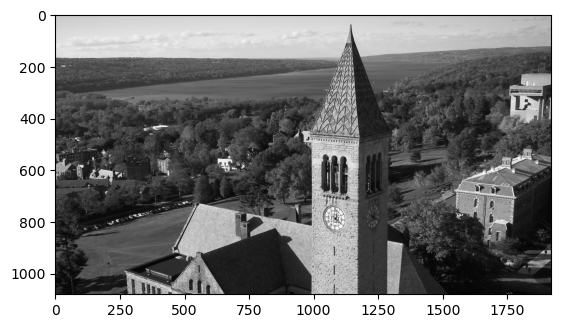

size(A) = (1080, 1920)


(1080, 1920)

In [2]:
A = Float64.(Gray.(load("cornell.jpg")))
PyPlot.imshow(A, cmap="gray");
@show size(A)

In [3]:
function rank_k_approx(A, k)
    F = svd(A)  # thin SVD by default
    Ak = F.U[:, 1:k] * Diagonal(F.S[1:k]) * F.V[:, 1:k]'
    return Ak
end

rank_k_approx (generic function with 1 method)

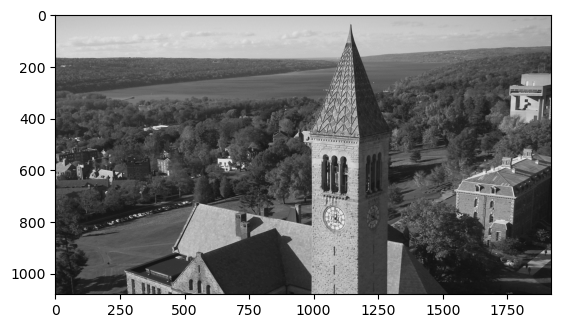

In [4]:
PyPlot.imshow(rank_k_approx(A, 500), cmap="gray");

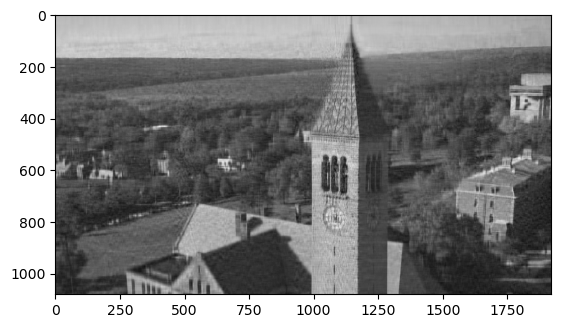

In [5]:
PyPlot.imshow(rank_k_approx(A, 50), cmap="gray");

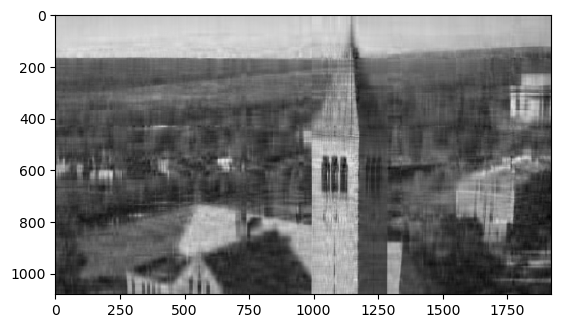

In [6]:
PyPlot.imshow(rank_k_approx(A, 20), cmap="gray");

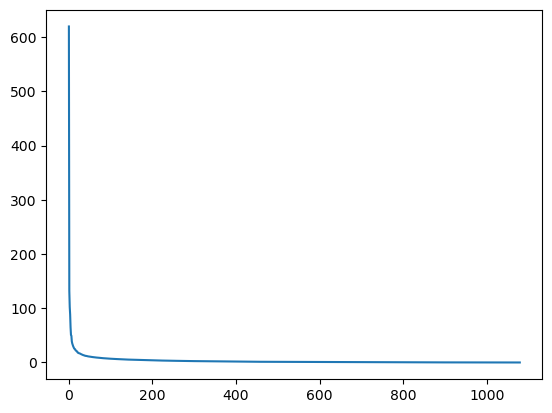

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7faae86ae430>

In [7]:
σs = svdvals(A)
plot(σs)

In [8]:
using CSV
using DataFrames

In [9]:
df = CSV.File("wdbc.data", header=0) |> DataFrame

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198
6,843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578
7,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127
8,84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366
9,844981,M,13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859


In [10]:
# Data matrix (rows are data points)
A = Matrix(df[:, 3:end])

# Pre-process data a bit
m, n = size(A)
A = (I - ones(m, m) / m) * A  # subtract mean
for j = 1:n; A[:, j] = normalize(A[:, j]); end  # unit variance

In [11]:
# Embedding: U2 = U[:, 1:2] * Sigma[1:2, 1:2] = X * V[:, 1:2]
U2 = A * svd(A).V[:, 1:2]

569×2 Array{Float64,2}:
 -0.385384    -0.0816889
 -0.100102     0.15797
 -0.240377     0.0450736
 -0.29861     -0.430775
 -0.164976     0.0816674
 -0.0997852   -0.16559
 -0.0938589    0.112772
 -0.0898517   -0.0981081
 -0.1331      -0.142192
 -0.266279    -0.32394
  0.0339743    0.111483
 -0.11114     -0.00279067
 -0.343134    -0.113231
  ⋮           
  0.170366    -0.00512157
  0.00413635   0.00895289
  0.045669    -0.054199
  0.0201969    0.00746297
  0.204174     0.0893406
 -0.248079    -0.146
 -0.366456     0.0240572
 -0.26995      0.149948
 -0.159027     0.150251
 -0.0526618    0.0797484
 -0.434934    -0.0700943
  0.229534     0.0281146

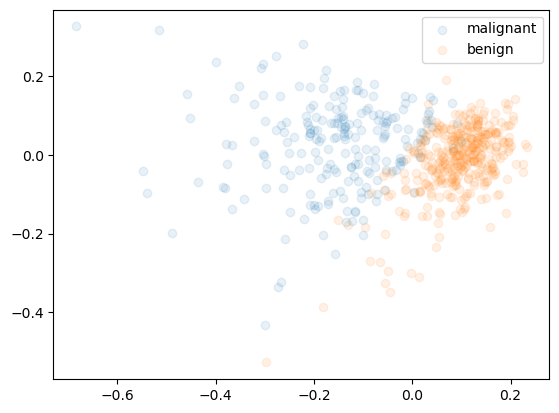

In [12]:
inds_M = findall(df[:, 2] .== "M")
inds_B = findall(df[:, 2] .== "B")
scatter(U2[inds_M,1], U2[inds_M,2], alpha=0.1, label="malignant") 
scatter(U2[inds_B,1], U2[inds_B,2], alpha=0.1, label="benign")
legend()
;

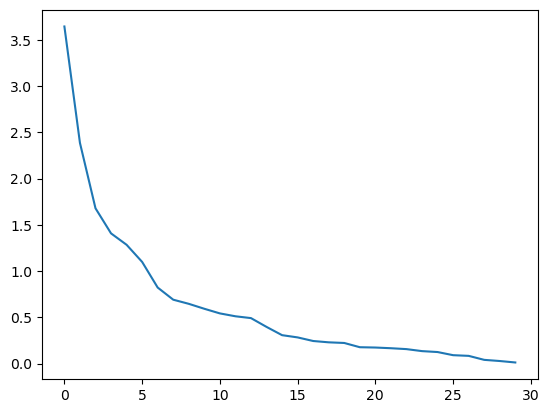

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fab193afbe0>

In [13]:
σs = svdvals(A)
plot(σs)